In [2]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#get mnist data from local file
def get_mnist_data():
    mnist_file_path = pathlib.Path("data\mnist.npz")
    with np.load(mnist_file_path) as f:
        images, labels = f["x_train"], f["y_train"]
    images = images.astype("float32") / 255.0
    images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
    labels = np.eye(10)[labels]
    return images, labels

In [4]:
def ReLU(x):
    return np.maximum(0, x)

def softmax(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def forward_propagation(w1, b1, w2, b2, X):
    z1 = np.dot(w1, X) + b1
    a1 = ReLU(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def get_predictions(a2):
    return np.argmax(a2, axis=0)

def get_accuracy(predictions, y):
    return  np.sum(predictions == y) / y.shape[0]

In [5]:
#get data from mnist dataset
images, labels = get_mnist_data()
m, n = images.shape

In [6]:
# MAIN

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

#change dimension of the data
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T



In [7]:
loaded_data = np.load("model_parameters.npz")

w1 = loaded_data["w1"]
w2 = loaded_data["w2"]
b1 = loaded_data["b1"]
b2 = loaded_data["b2"]

In [8]:
z1, a1, z2, a2 = forward_propagation(w1, b1, w2, b2, X_test)
print ("Accuracy: ", get_accuracy(get_predictions(a2), get_predictions(y_test)) * 100, "%")


Accuracy:  92.88333333333333 %


Prediction:  8
Label:  8


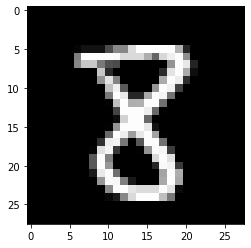

In [10]:
index = 666
vect_X = X_test[:, index,None]
prediction = get_predictions(a2)
label = get_predictions(y_test[:, index])
print("Prediction: ", prediction[index])
print("Label: ", label)

current_image = vect_X.reshape((28, 28)) * 255.0

plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()
